<a href="https://colab.research.google.com/github/SnehDesai22/Mumbai_real_estate_price_predictor/blob/main/Mumbai_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [238]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dravidvaishnav/mumbai-house-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mumbai-house-prices


In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [240]:
dataset_path = "/root/.cache/kagglehub/datasets/dravidvaishnav/mumbai-house-prices/versions/1"
files = os.listdir(dataset_path)
files

['Mumbai House Prices.csv']

In [241]:
csv_file = os.path.join(dataset_path, 'Mumbai House Prices.csv')
df = pd.read_csv(csv_file)
df


,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown


In [242]:
def convert_to_lakhs(row):
    if row["price_unit"] == "L":
        return row["price"]
    elif row["price_unit"] == "Cr":
        return row["price"] * 100

df["price_lakhs"] = df.apply(convert_to_lakhs, axis=1)
df

,bhk,type,locality,area,price,price_unit,region,status,age,price_lakhs
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New,94.11
...,...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,7.00,Cr,Juhu,Ready to move,Unknown,700.00
76034,5,Apartment,Parinee Liva Roca,3049,12.00,Cr,Juhu,Ready to move,Unknown,1200.00
76035,4,Apartment,Lodha Seaview,3313,10.00,Cr,Napeansea Road,Ready to move,Unknown,1000.00
76036,2,Apartment,Hubtown Serene,1305,4.25,Cr,Bandra East,Ready to move,Unknown,425.00


In [243]:
df.describe()

,bhk,area,price,price_lakhs
count,76038.000000,76038.000000,76038.00000,76038.000000
mean,2.015111,1024.536850,29.38227,168.417795
std,0.922754,670.276165,32.90345,217.665511
min,1.000000,127.000000,1.00000,4.490000
25%,1.000000,640.000000,1.75000,64.000000
50%,2.000000,872.000000,5.50000,110.000000
75%,3.000000,1179.000000,59.00000,194.000000
max,10.000000,16000.000000,99.99000,6000.000000


In [244]:
df=df.drop(['price','price_unit'], axis=1)

In [245]:
df['region'].value_counts()

,count
region,
Thane West,14868
Mira Road East,9902
Dombivali,3041
Kandivali East,2568
Kharghar,2362
...,...
Adaigaon,1
Sector-4 New Panvel,1
Versova,1


In [246]:
df['type'].value_counts()

,count
type,
Apartment,74854
Studio Apartment,882
Villa,226
Independent House,73
Penthouse,3


In [247]:
df.isnull().sum()

,0
bhk,0
type,0
locality,0
area,0
region,0
status,0
age,0
price_lakhs,0


In [248]:
df=df.drop(['locality','status','age'], axis=1)

In [249]:
df

,bhk,type,area,region,price_lakhs
0,3,Apartment,685,Andheri West,250.00
1,2,Apartment,640,Naigaon East,52.51
2,2,Apartment,610,Borivali West,173.00
3,2,Apartment,876,Panvel,59.98
4,2,Apartment,659,Mira Road East,94.11
...,...,...,...,...,...
76033,3,Apartment,1527,Juhu,700.00
76034,5,Apartment,3049,Juhu,1200.00
76035,4,Apartment,3313,Napeansea Road,1000.00
76036,2,Apartment,1305,Bandra East,425.00


In [250]:
df["region"].value_counts()

,count
region,
Thane West,14868
Mira Road East,9902
Dombivali,3041
Kandivali East,2568
Kharghar,2362
...,...
Adaigaon,1
Sector-4 New Panvel,1
Versova,1


In [251]:
(df["region"].value_counts() <= 10).sum()


np.int64(114)

In [252]:
others = df["region"].value_counts() <= 10
other_regions = others[others == True]
df["region"] = df["region"].apply(lambda x : "others" if x in other_regions else x)
df["region"].value_counts()

,count
region,
Thane West,14868
Mira Road East,9902
Dombivali,3041
Kandivali East,2568
Kharghar,2362
...,...
Mazgaon,16
Nalasopara East,15
Kalwa,15


<Axes: xlabel='price_lakhs', ylabel='Density'>

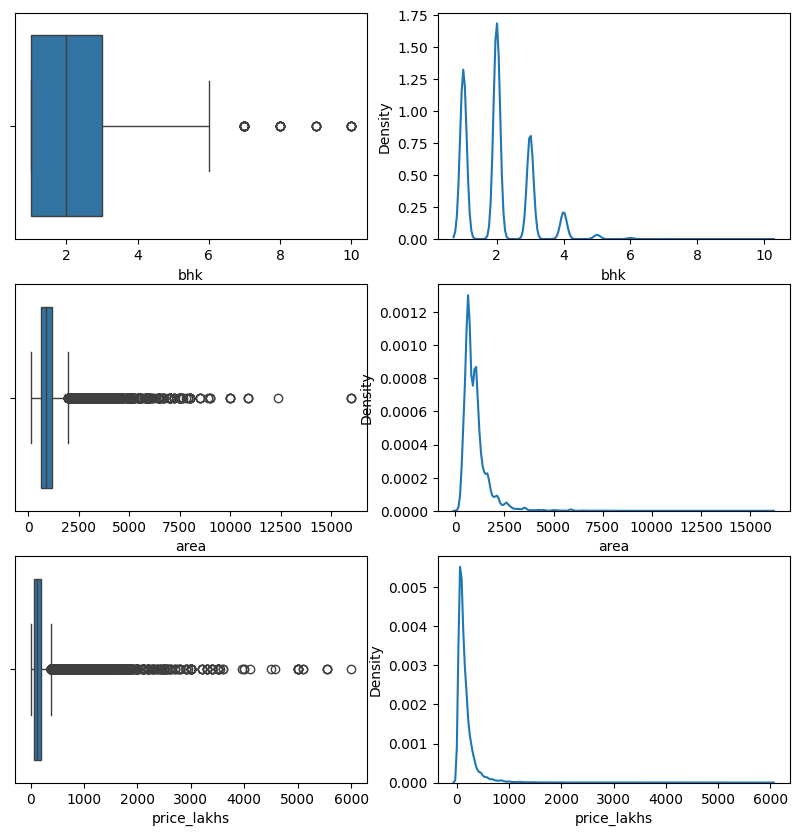

In [302]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.boxplot(x=df["bhk"])

plt.subplot(3,2,2)
sns.kdeplot(x=df["bhk"])


plt.subplot(3,2,3)
sns.boxplot(x=df["area"])

plt.subplot(3,2,4)
sns.kdeplot(x=df["area"])


plt.subplot(3,2,5)
sns.boxplot(x=df["price_lakhs"])

plt.subplot(3,2,6)
sns.kdeplot(x=df["price_lakhs"])


Text(0.5, 0, 'BHK')

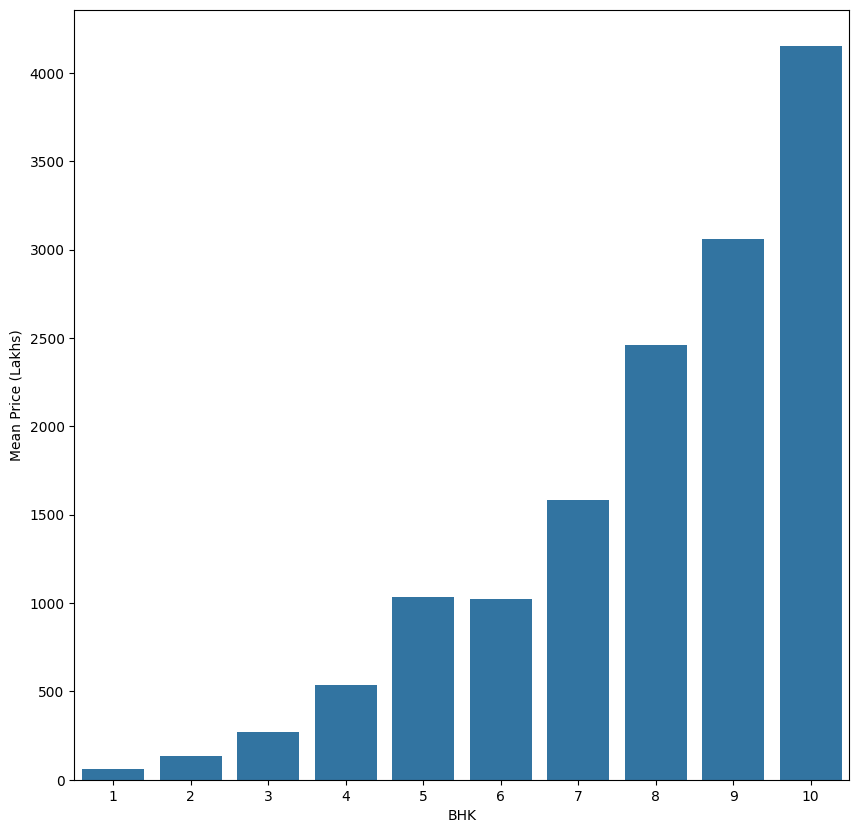

In [280]:
mean_price_by_bhk = df.groupby('bhk')['price_lakhs'].mean()

plt.figure(figsize=(10, 10))

sns.barplot(x=mean_price_by_bhk.index, y=mean_price_by_bhk.values)
plt.ylabel("Mean Price (Lakhs)")
plt.xlabel("BHK")

Text(0.5, 0, 'area')

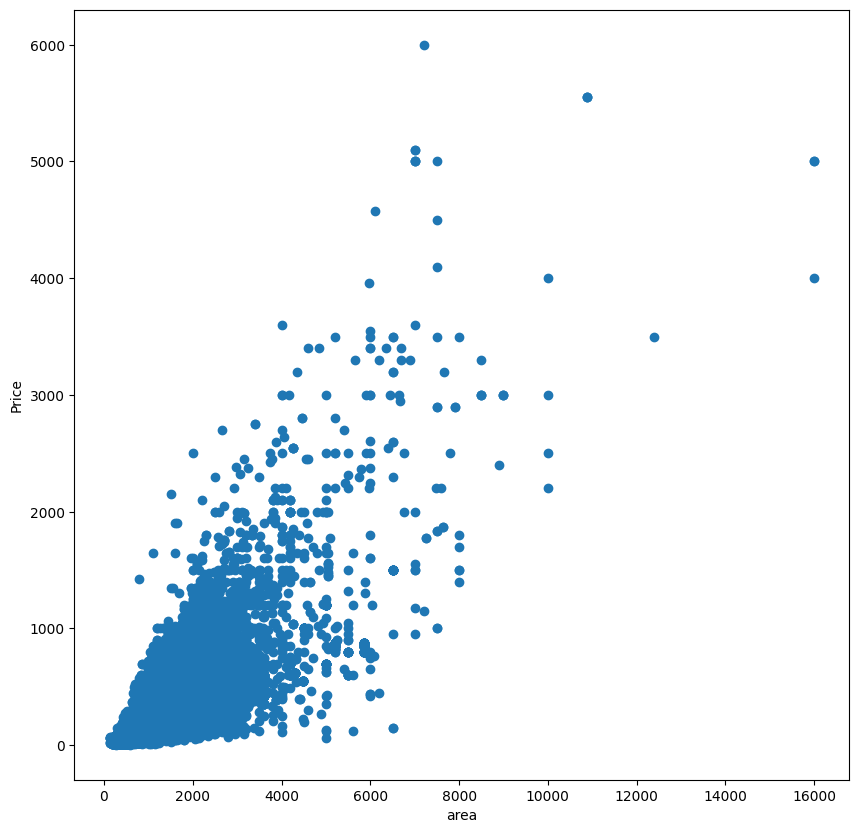

In [275]:
plt.figure(figsize=(10,10))
plt.scatter(df["area"],df["price_lakhs"])
plt.ylabel("Price")
plt.xlabel("area")

Text(0.5, 0, 'Property Type')

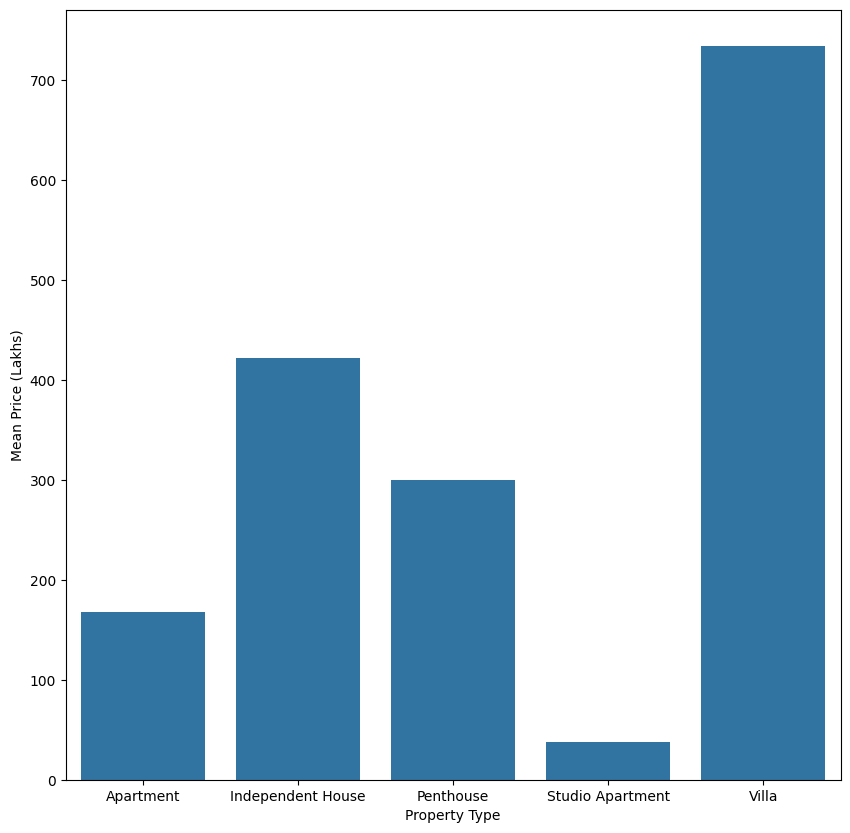

In [279]:

mean_price_by_type = df.groupby('type')['price_lakhs'].mean()

plt.figure(figsize=(10, 10))

sns.barplot(x=mean_price_by_type.index, y=mean_price_by_type.values)
plt.ylabel("Mean Price (Lakhs)")
plt.xlabel("Property Type")

In [257]:
df['price_per_sqft']=df['price_lakhs']/df['area']

In [258]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
region_means = df.groupby('region')['price_per_sqft'].mean()
df['region_encoded'] = df['region'].map(region_means)
df['type_encoded'] = le.fit_transform(df['type'])
df

,bhk,type,area,region,price_lakhs,price_per_sqft,region_encoded,type_encoded
0,3,Apartment,685,Andheri West,250.00,0.364964,0.237135,0
1,2,Apartment,640,Naigaon East,52.51,0.082047,0.062658,0
2,2,Apartment,610,Borivali West,173.00,0.283607,0.218792,0
3,2,Apartment,876,Panvel,59.98,0.068470,0.096147,0
4,2,Apartment,659,Mira Road East,94.11,0.142807,0.099368,0
...,...,...,...,...,...,...,...,...
76033,3,Apartment,1527,Juhu,700.00,0.458415,0.434013,0
76034,5,Apartment,3049,Juhu,1200.00,0.393572,0.434013,0
76035,4,Apartment,3313,Napeansea Road,1000.00,0.301841,0.519784,0
76036,2,Apartment,1305,Bandra East,425.00,0.325670,0.366265,0


In [274]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [282]:
x_train=train_df[['bhk','area','region_encoded','type_encoded']]
y_train=train_df['price_lakhs']
x_test=test_df[['bhk','area','region_encoded','type_encoded']]
y_test=test_df['price_lakhs']

In [283]:
x_train.shape

(60830, 4)

In [284]:
x_test.shape

(15208, 4)

In [285]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [286]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [7, 10, 15],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree' : [0.8, 1.0]
}

model = XGBRegressor(enable_categorical=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)



In [287]:
grid_search.fit(x_train, y_train_log)
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 100, 'subsample': 0.8}
Best R² Score: 0.9332310818917151


In [288]:
best_model = grid_search.best_estimator_

In [300]:
y_pred_log=best_model.predict(x_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred_log, y_test_log)
rmse=np.sqrt(mse)

r2=r2_score(y_test_log,y_pred_log)
rmse, r2

(np.float64(0.21131950061333682), 0.9353966098531932)

/tmp/ipython-input-303-1973405620.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred))


<Axes: xlabel='price_lakhs', ylabel='Density'>

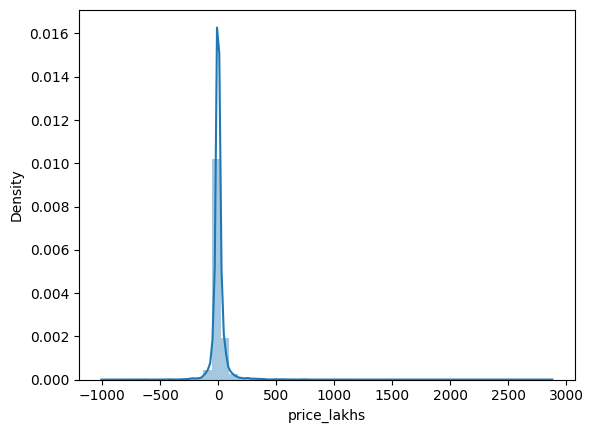

In [303]:
y_pred=np.expm1(y_pred_log)
sns.distplot((y_test - y_pred))


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

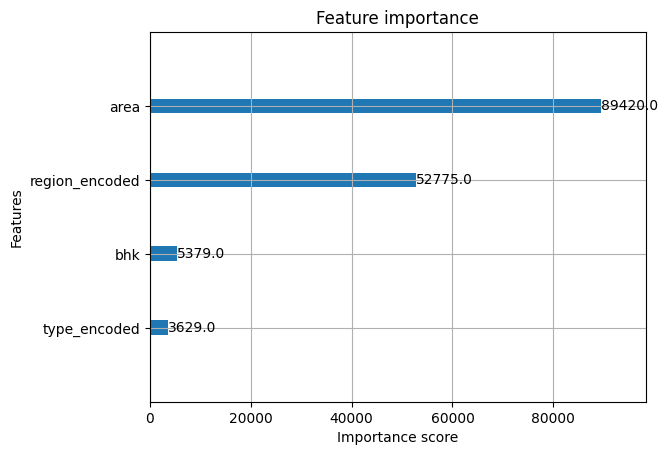

In [304]:
from xgboost import plot_importance
plot_importance(best_model, importance_type='weight')

In [291]:
sorted(df["region"].unique())

['Agripada',
 'Airoli',
 'Ambarnath',
 'Ambernath East',
 'Ambernath West',
 'Andheri East',
 'Andheri West',
 'Anjurdive',
 'Badlapur East',
 'Badlapur West',
 'Bandra East',
 'Bandra Kurla Complex',
 'Bandra West',
 'Belapur',
 'Bhandup East',
 'Bhandup West',
 'Bhayandar East',
 'Bhayandar West',
 'Bhiwandi',
 'Boisar',
 'Borivali East',
 'Borivali West',
 'Byculla',
 'Chembur',
 'Colaba',
 'Dadar East',
 'Dadar West',
 'Dahisar',
 'Deonar',
 'Diva',
 'Dombivali',
 'Dombivali East',
 'Dronagiri',
 'Ghansoli',
 'Ghatkopar East',
 'Ghatkopar West',
 'Girgaon',
 'Goregaon East',
 'Goregaon West',
 'Jogeshwari East',
 'Jogeshwari West',
 'Juhu',
 'Juinagar',
 'Kalamboli',
 'Kalwa',
 'Kalyan East',
 'Kalyan West',
 'Kamothe',
 'Kandivali East',
 'Kandivali West',
 'Kanjurmarg',
 'Karanjade',
 'Karjat',
 'Kasheli',
 'Khar',
 'Kharghar',
 'Khopoli',
 'Koper Khairane',
 'Kurla',
 'Lower Parel',
 'Mahalaxmi',
 'Mahim',
 'Malad East',
 'Malad West',
 'Marine Lines',
 'Matunga',
 'Mazagaon',
 

In [305]:

region_mean_price = df.groupby('region')['price_per_sqft'].mean()


user_input_df = pd.DataFrame({
    'bhk': [3],
    'area': [1000],
    'region': ['Dadar West'],
    'type': ['Apartment']
})


user_input_df['region_encoded'] = user_input_df['region'].map(region_mean_price)


from sklearn.preprocessing import LabelEncoder

le_type_user = LabelEncoder()
le_type_user.fit(df['type'])  # use training data

user_input_df['type_encoded'] = le_type_user.transform(user_input_df['type'])




user_input_features = user_input_df[['bhk', 'area', 'region_encoded', 'type_encoded']]

predicted_price_log = best_model.predict(user_input_features)
predicted_price = np.expm1(predicted_price_log)

print(f"The predicted price is: {predicted_price[0]:.2f} Lakhs")


The predicted price is: 442.07 Lakhs
